In [17]:
import sys
import os
from pathlib import Path
import pprint # For pretty printing sys.path

# --- Path Setup ---
current_dir = Path.cwd()
project_root = current_dir.parent 
project_root_str = str(project_root)
if project_root_str not in sys.path:
    sys.path.insert(0, project_root_str)

from src.metrics import Pelt, STLFeatures, ACF_Features, LinearRegression, CrossingPoints, SpectralEntropy, EntropyPairs, HighFluctuation

In [ ]:
print(f"\nLoading M3 Monthly data using datasetsforecast...")

# Define the data directory relative to the project root
if 'project_root' not in locals():
     current_dir = os.getcwd()
     project_root = os.path.dirname(current_dir)
     print(f"Defining project_root as: {project_root}")

data_dir = os.path.join(project_root, 'data', 'm3_monthly')

os.makedirs(data_dir, exist_ok=True)
print(f"Ensuring data directory exists/created: '{data_dir}'")

loaded_data = M3.load(directory=data_dir, group='Monthly')

Y_df = None # Initialize Y_df
if isinstance(loaded_data, (list, tuple)) and len(loaded_data) > 0:
    Y_df = loaded_data[0]
elif isinstance(loaded_data, pd.DataFrame):
    Y_df = loaded_data
else:
    print(f"Warning: Unexpected data type loaded: {type(loaded_data)}. Assigning None.")

if Y_df is not None:
    print("Data loaded successfully.")
    print(f"DataFrame shape: {Y_df.shape}")
    Y_df['ds'] = pd.to_datetime(Y_df['ds'])
    print("DataFrame 'ds' column converted to datetime.")
    DATA_LOADED = True
else:
    print("Failed to load data into DataFrame.")
    DATA_LOADED = False

In [ ]:
# --- Path Setup ---
current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)
expected_end = "EasyTest"
if not project_root.endswith(expected_end):
      print(f"WARNING: Calculated project root '{project_root}' might be incorrect based on CWD '{current_dir}'. Adjust path logic if needed.")
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Added project root to sys.path: {project_root}")
else:
     print(f"Project root already in sys.path: {project_root}")

print("\nDynamically importing and running analysis function from testing/easytest_metrics.py...")

calculated_extremes = None
custom_analysis_func = None
MODULE_PATH = "testing.easytest_metrics"
FUNCTION_NAME = "test_easytest_metrics"

# --- Dynamic Import and Execution ---
try:
    custom_module = importlib.import_module(MODULE_PATH)
    custom_analysis_func = getattr(custom_module, FUNCTION_NAME)
    print(f"Successfully imported function '{FUNCTION_NAME}' from module '{MODULE_PATH}'.")
    calculated_extremes = custom_analysis_func()
    print("Analysis function completed.")
except ModuleNotFoundError:
    print(f"ERROR: Could not find module '{MODULE_PATH}'.")
    print("Check if 'testing/__init__.py' and 'testing/easytest_metrics.py' exist and project root was added correctly to sys.path.")
    import pprint
    print("Current sys.path:")
    pprint.pprint(sys.path)
except ImportError as e:
    print(f"ERROR: Could not import module '{MODULE_PATH}'. Potentially an error within the module itself? Details: {e}")
except AttributeError:
    print(f"ERROR: Could not find function '{FUNCTION_NAME}' within module '{MODULE_PATH}'. Check function name.")
except Exception as e:
    print(f"ERROR: Running {FUNCTION_NAME} failed: {e}")


# --- Map Calculators and Extreme Datasets ---

extreme_datasets_info = None
CALCULATORS_DEFINED = False


required_classes_exist = ('Pelt' in locals() and
                          'STLFeatures' in locals() and
                          'ACF_Features' in locals() and
                          'CrossingPoints' in locals() and
                          'LinearRegression' in locals() and
                          'EntropyPairs' in locals() and
                          'SpectralEntropy' in locals() and
                          'HighFluctuation' in locals()
                         )

if required_classes_exist and calculated_extremes:
    print("\nInstantiating metric calculators...")
    pelt_calculator = Pelt()
    stl_calculator = STLFeatures(freq=12)
    acf_calculator = ACF_Features(nlags=10)
    crossing_points_calculator = CrossingPoints()
    lr_calculator = LinearRegression()
    entropy_pairs_calculator = EntropyPairs()
    spectral_entropy_calculator = SpectralEntropy(sf=12)
    high_fluctuation_calculator = HighFluctuation()
    print("Metric calculators instantiated.")

    print("\nMapping dynamically calculated extreme datasets...")
    temp_extreme_info = {}

    feature_keys_from_script = [
        "Pelt_Num_Breakpoints", "STL_Trend_Strength", "ACF_FirstLag",
        "CrossingPoints",
        "LinearRegression_Slope", "LinearRegression_R2",
        "EntropyPairs_Value", "SpectralEntropy_Value", "HighFluctuation_Value"
    ]


    all_keys_found = True
    for key in feature_keys_from_script:
        if key not in calculated_extremes:
            print(f"Warning: Key '{key}' not found in calculated_extremes dictionary.")
            all_keys_found = False
            continue

        extreme_pair = calculated_extremes.get(key, {})
        low_id = extreme_pair.get('lowest', (None, None))[0]
        high_id = extreme_pair.get('highest', (None, None))[0]

        if low_id is None or high_id is None:
             print(f"Warning: Missing low or high ID for feature '{key}'. Skipping.")
             all_keys_found = False
             continue

        if "Pelt" in key:
            calculator = pelt_calculator
            params = {"pen": None}
        elif "STL" in key:
            calculator = stl_calculator
            params = {}
        elif "ACF" in key:
            calculator = acf_calculator
            params = {}
        elif "CrossingPoints" in key:
            calculator = crossing_points_calculator
            params = {}
        elif "LinearRegression" in key:
            calculator = lr_calculator
            params = {}
        elif "EntropyPairs" in key:
             calculator = entropy_pairs_calculator
             params = {}
        elif "SpectralEntropy" in key:
             calculator = spectral_entropy_calculator
             params = {}
        elif "HighFluctuation" in key:
             calculator = high_fluctuation_calculator
             params = {}
        else:
            print(f"Warning: No calculator defined for key '{key}'. Skipping.")
            all_keys_found = False
            continue

        temp_extreme_info[key] = {
            "low_id": low_id,
            "high_id": high_id,
            "calculator": calculator,
            "params": params
        }

    if all_keys_found and temp_extreme_info:
        extreme_datasets_info = temp_extreme_info
        print("Extreme dataset IDs and metric calculators mapped successfully.")
        CALCULATORS_DEFINED = True
    else:
        print("\nFailed to map all extreme datasets due to missing keys or IDs.")
        extreme_datasets_info = None
        CALCULATORS_DEFINED = False


elif not required_classes_exist:
    print("\nSkipping definition: One or more required metric class definitions were not found in the local scope.")
elif not calculated_extremes:
    print("\nSkipping definition: Failed to get 'calculated_extremes' from the dynamically run script.")

## Pelt_Num_Breakpoints

This feature detects the number of points where the trend changes.  
**Low value:** The trend has few/none shifting points, and is constant through time.  
**High value:** The trend is constantly shifting, provoking many structural changes.

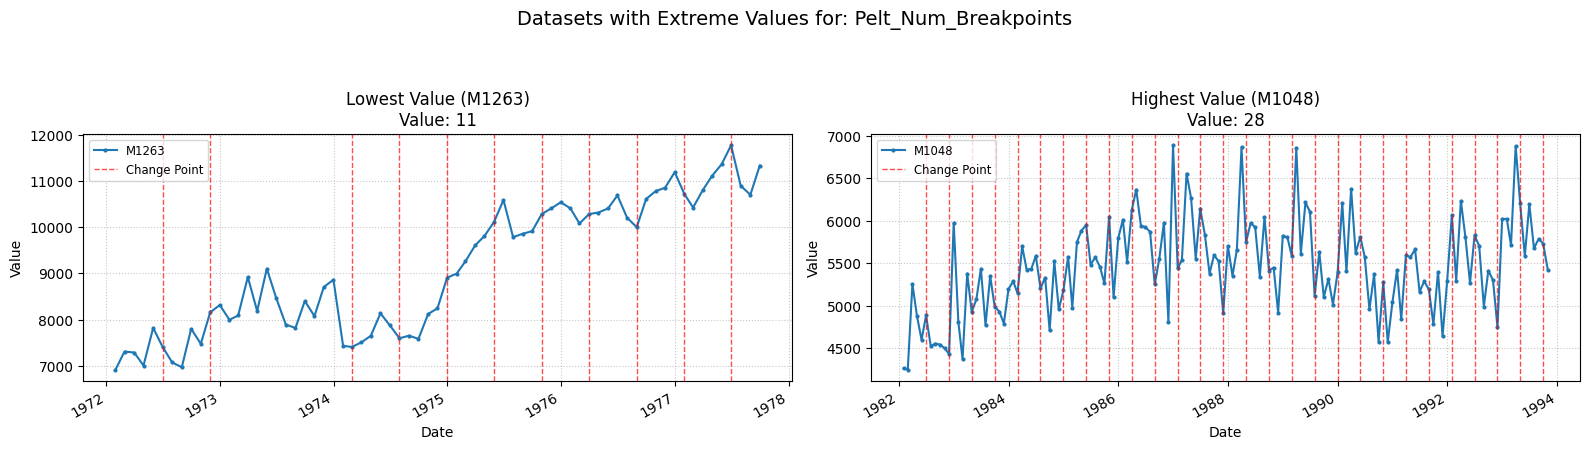

Parameter,Type,Description,Default
model,str,"Cost function model (e.g., ""l1"", ""l2"", ""rbf"")","""l2"""
custom_cost,BaseCost or None,Custom cost function object. Overrides `model`.,None
min_size,int,Minimum allowable segment length.,2
jump,int,Subsampling step size for checking breakpoints.,5
params,dict or None,Additional parameters dictionary for the cost `model`.,None


## STL_Trend_Strength

This feature computes the strength of a trend within the time-series.  
**Low value:** A value close to zero means there are few/none indicators of a trend in the time series.  
**High value:** A value close to one means there are strong signs of the series containing a trend.

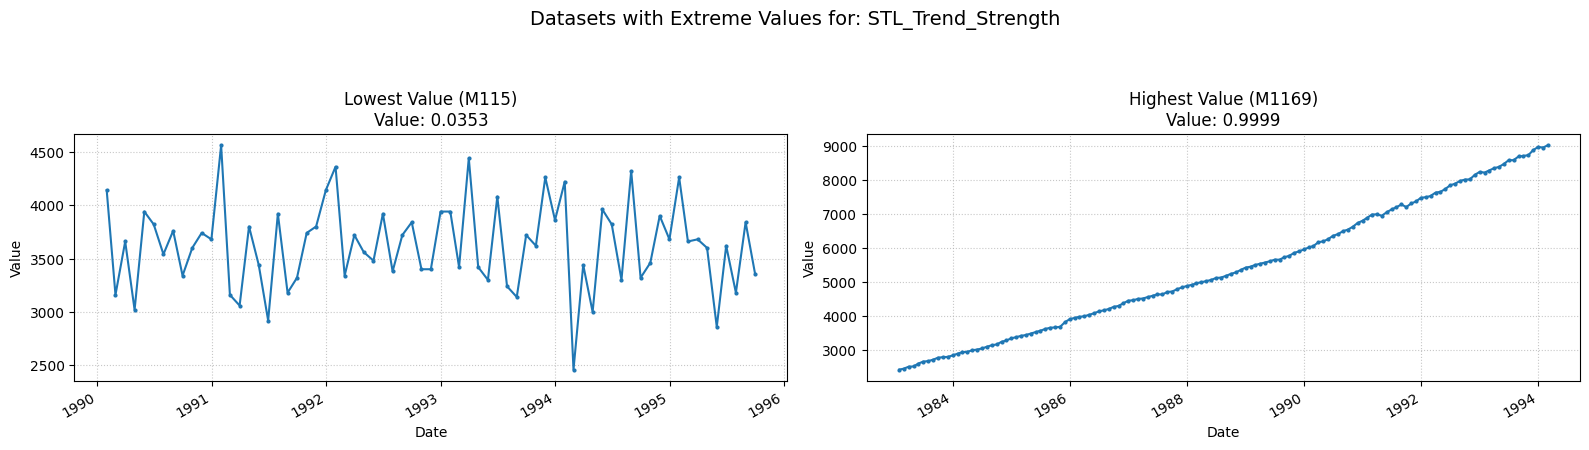

Parameter,Type,Description,Default
freq,int,"Frequency (period) of the time series (e.g., 12 for monthly).",1
seasonal,int,Length of the seasonal smoother (must be odd).,7
robust,bool,Flag for robust fitting.,False


## ACF_FirstLag

This feature measures the first autocorrelation coefficient (lag 1).  
**Low value:** A negative value indicates negative autocorrelation (tendency to oscillate).  
**High value:** A positive value indicates positive autocorrelation (tendency to persist).

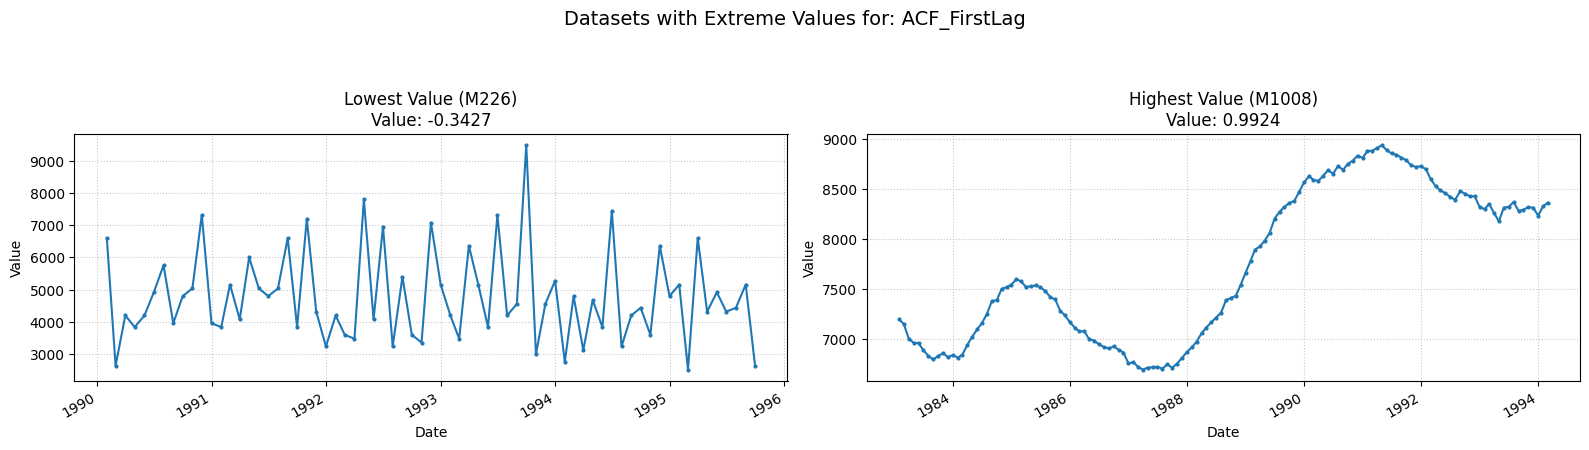

Parameter,Type,Description,Default
nlags,int,Number of lags for ACF calculation.,10


## CrossingPoints

This feature counts the number of times a time-series crosses the median line. <br>**Low value:** Means there are few/none oscillations across the time-series. <br>**High value:** Means there are frequent oscillations across the time-series.

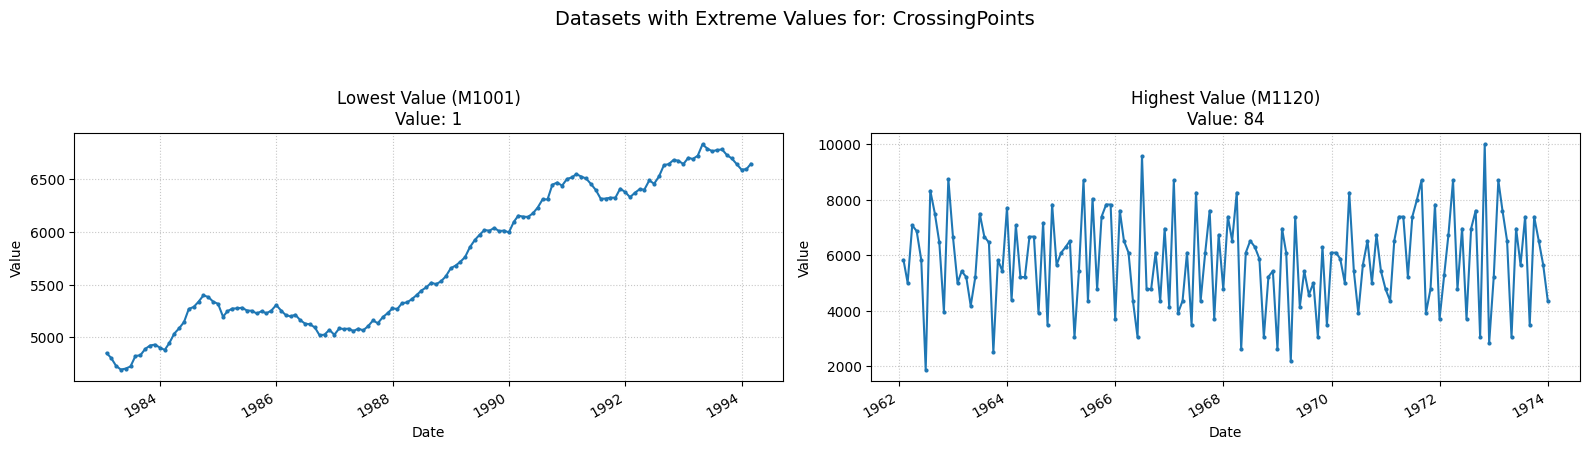

**No Parameters**

## LinearRegression_Slope

This feature measures the overall linear trend slope.  
**Low value:** A negative value means there is a downward trend.  
**High value:** A positive value means an upward trend.

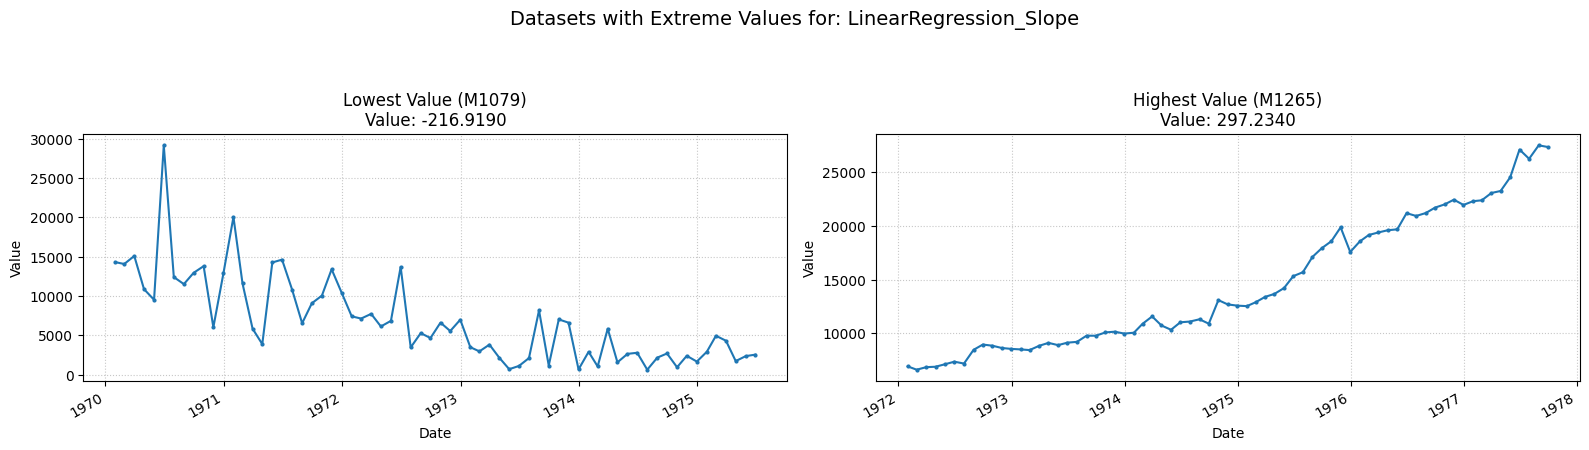

**No Parameters**

## LinearRegression_R2

This feature measures how well a linear trend fits the time-series (Coefficient of Determination, $R^2$).  
**Low value:** A value close to zero means a linear model explains little variance.  
**High value:** A value close to one means a linear model explains much of the variance.

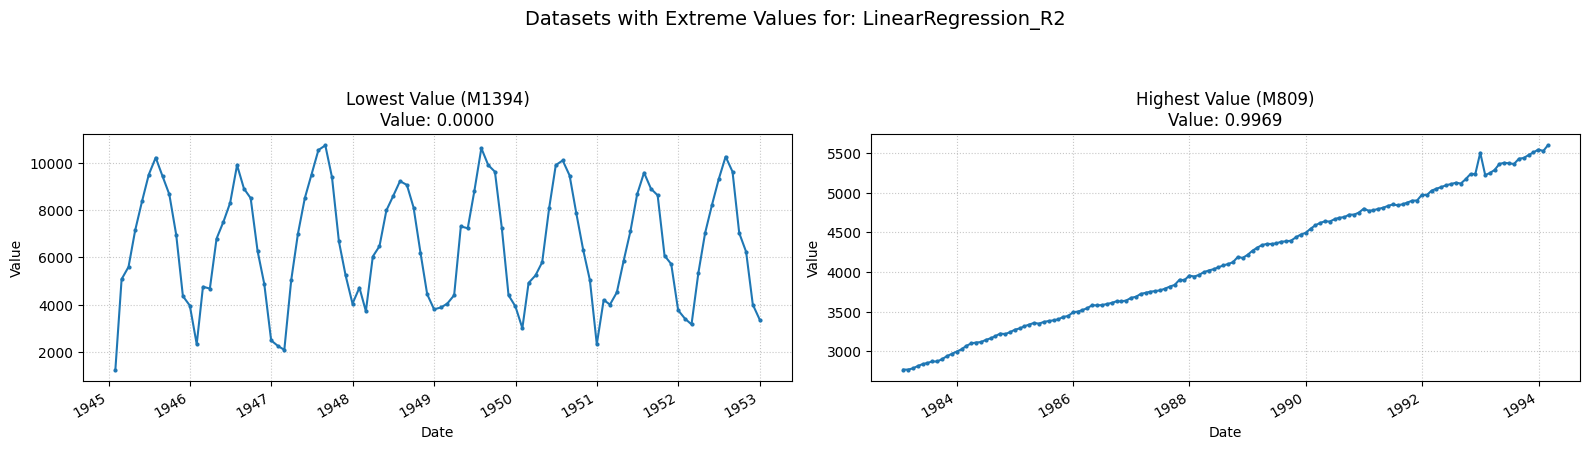

**No Parameters**

## EntropyPairs_Value

This feature measures entropy based on the 3 quantile bins of the time-series. <br>**Low value:** Means simpler patterns in the time-series sequence. <br>**High value:** Means more complex patterns in the time-series sequence.

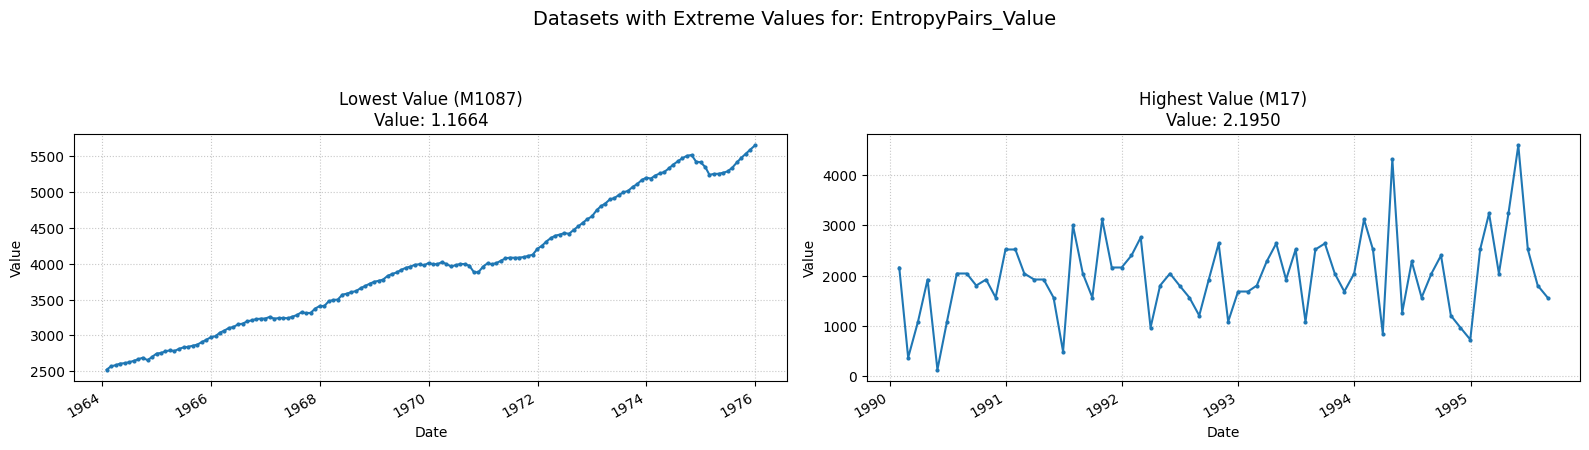

**No Parameters**

## SpectralEntropy_Value

This feature measures the forceastibility of a time-series. <br>**Low value:** Means there are strong signs of a trend across the time-series. <br>**High value:** Means the time-series is probably white-noise.

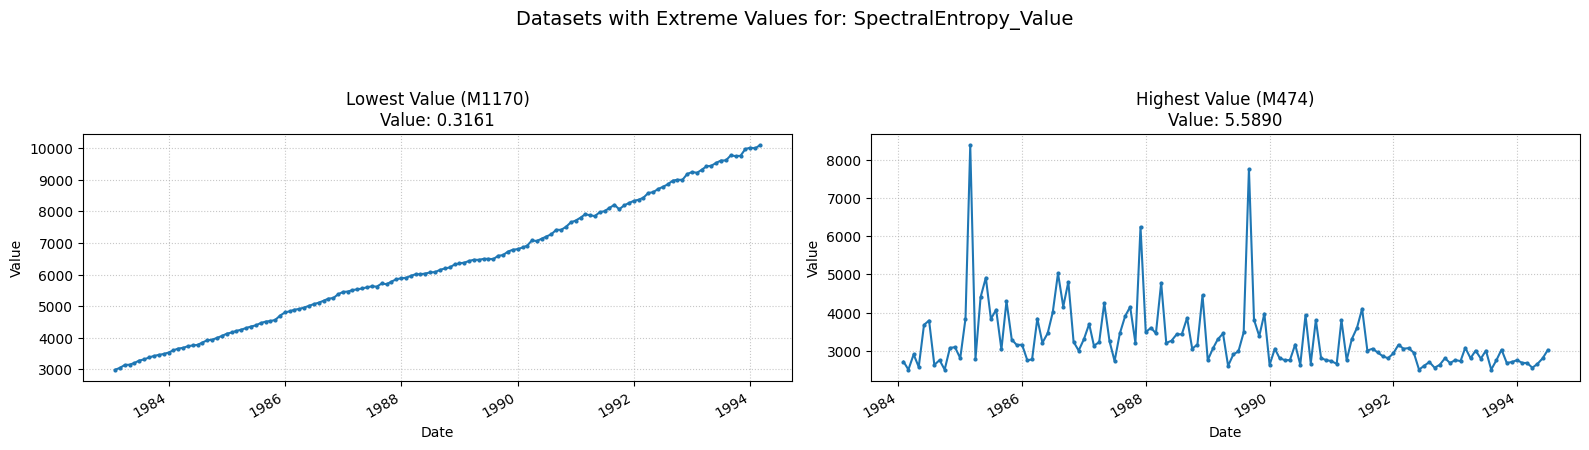

Parameter,Type,Description,Default
sf,float,Sampling frequency of the time series.,(Mandatory)
method,str,"PSD calculation method (""welch"" or ""fft"").","""welch"""
nperseg,int or None,"Segment length for Welch method. If None, defaults based on data length.",None
normalize,bool,"Normalize entropy output to [0, 1].",False


## HighFluctuation_Value

Measures the proportion of large changes in the time-series. <br>**Low value:** Means few/none large fluctuations. <br>**High value:** Means many large fluctuations.

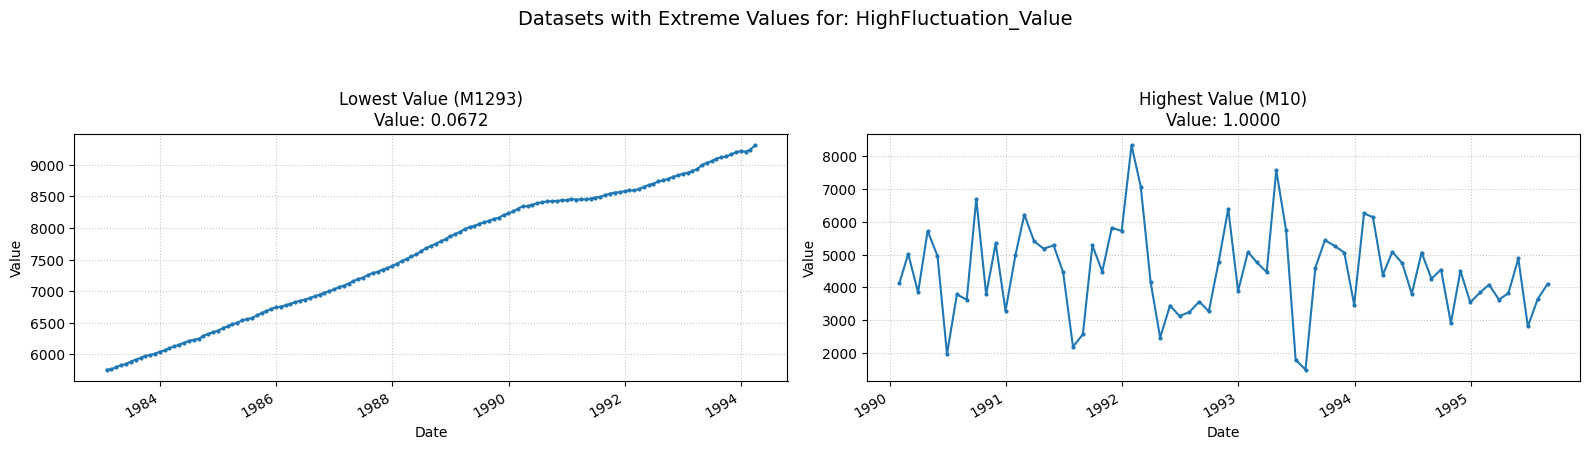

**No Parameters**

In [21]:
# ==============================================================================
# Parameter Definitions
# ==============================================================================

# Pelt Parameters
pelt_parameters = [
    {"Parameter": "model", "Type": "str", "Description": 'Cost function model (e.g., "l1", "l2", "rbf")', "Default": '"l2"'},
    {"Parameter": "custom_cost", "Type": "BaseCost or None", "Description": "Custom cost function object. Overrides `model`.", "Default": "None"},
    {"Parameter": "min_size", "Type": "int", "Description": "Minimum allowable segment length.", "Default": "2"},
    {"Parameter": "jump", "Type": "int", "Description": "Subsampling step size for checking breakpoints.", "Default": "5"},
    {"Parameter": "params", "Type": "dict or None", "Description": "Additional parameters dictionary for the cost `model`.", "Default": "None"}
]

# STLFeatures Parameters
stl_parameters = [
    {"Parameter": "freq", "Type": "int", "Description": "Frequency (period) of the time series (e.g., 12 for monthly).", "Default": "1"},
    {"Parameter": "seasonal", "Type": "int", "Description": "Length of the seasonal smoother (must be odd).", "Default": "7"},
    {"Parameter": "robust", "Type": "bool", "Description": "Flag for robust fitting.", "Default": "False"}
]

# ACF_Features Parameters
acf_parameters = [
    {"Parameter": "nlags", "Type": "int", "Description": "Number of lags for ACF calculation.", "Default": "10"}
]

# CrossingPoints Parameters
cp_parameters = []

# LinearRegression Parameters
lr_parameters = []

# EntropyPairs Parameters
entropy_pairs_parameters = []

# SpectralEntropy Parameters
spectral_entropy_parameters = [
    {"Parameter": "sf", "Type": "float", "Description": "Sampling frequency of the time series.", "Default": "(Mandatory)"},
    {"Parameter": "method", "Type": "str", "Description": 'PSD calculation method ("welch" or "fft").', "Default": '"welch"'},
    {"Parameter": "nperseg", "Type": "int or None", "Description": "Segment length for Welch method. If None, defaults based on data length.", "Default": "None"},
    {"Parameter": "normalize", "Type": "bool", "Description": "Normalize entropy output to [0, 1].", "Default": "False"}
]

# HighFluctuation Parameters
high_fluctuation_parameters = []


# ==============================================================================
# --- Feature Parameter Mapping ---
# ==============================================================================
feature_param_map = {
    "Pelt_Num_Breakpoints": pelt_parameters,
    "STL_Trend_Strength": stl_parameters,
    "ACF_FirstLag": acf_parameters,
    "CrossingPoints": cp_parameters,
    "LinearRegression_Slope": lr_parameters,
    "LinearRegression_R2": lr_parameters,
    "EntropyPairs_Value": entropy_pairs_parameters,
    "SpectralEntropy_Value": spectral_entropy_parameters,
    "HighFluctuation_Value": high_fluctuation_parameters
}

# ==============================================================================
# --- display_parameter_table Function (Using INITIAL code version) ---
# ==============================================================================
def display_parameter_table(parameters_list, feature_name):
    """Displays an HTML table of parameters or 'No Parameters' message."""
    if not parameters_list:
        display(Markdown("**No Parameters**"))
        return

    try:
        headers = list(parameters_list[0].keys())
        data_rows = [list(param.values()) for param in parameters_list]
    except (IndexError, AttributeError):
         print(f"\nError formatting parameters for {feature_name}.")
         return

    html_table = tabulate(data_rows, headers=headers, tablefmt="html")
    display(HTML(html_table))


# ==============================================================================
# --- Main Analysis Loop ---
# ==============================================================================
if 'extreme_datasets_info' in locals() and extreme_datasets_info is not None and 'Y_df' in locals() and Y_df is not None:

    required_display_classes = ['Pelt', 'STLFeatures', 'ACF_Features', 'CrossingPoints', 'LinearRegression', 'EntropyPairs', 'SpectralEntropy', 'HighFluctuation']


    for feature_name, details in extreme_datasets_info.items():
        # --- Feature Name Title ---
        display(Markdown(f"## {feature_name}"))

        # --- Data Setup ---
        ids_to_process = {
            "Lowest Value": details["low_id"],
            "Highest Value": details["high_id"]
        }
        base_calculator = details["calculator"]
        params = details["params"]

        # --- Feature Description (Using INITIAL descriptions where available) ---
        if feature_name == "Pelt_Num_Breakpoints":
             display(Markdown(f"This feature detects the number of points where the trend changes.  \n**Low value:** The trend has few/none shifting points, and is constant through time.  \n**High value:** The trend is constantly shifting, provoking many structural changes."))
        elif feature_name == "STL_Trend_Strength":
             display(Markdown(f"This feature computes the strength of a trend within the time-series.  \n**Low value:** A value close to zero means there are few/none indicators of a trend in the time series.  \n**High value:** A value close to one means there are strong signs of the series containing a trend."))
        elif feature_name == "ACF_FirstLag":
             display(Markdown(f"This feature measures the first autocorrelation coefficient (lag 1).  \n**Low value:** A negative value indicates negative autocorrelation (tendency to oscillate).  \n**High value:** A positive value indicates positive autocorrelation (tendency to persist)."))
        elif feature_name == "CrossingPoints":
             display(Markdown(f"This feature counts the number of times a time-series crosses the median line. <br>**Low value:** Means there are few/none oscillations across the time-series. <br>**High value:** Means there are frequent oscillations across the time-series."))
        elif feature_name == "LinearRegression_Slope":
             display(Markdown(f"This feature measures the overall linear trend slope.  \n**Low value:** A negative value means there is a downward trend.  \n**High value:** A positive value means an upward trend."))
        elif feature_name == "LinearRegression_R2":
             display(Markdown(f"This feature measures how well a linear trend fits the time-series (Coefficient of Determination, $R^2$).  \n**Low value:** A value close to zero means a linear model explains little variance.  \n**High value:** A value close to one means a linear model explains much of the variance."))
        elif feature_name == "EntropyPairs_Value":
             display(Markdown(f"This feature measures entropy based on the 3 quantile bins of the time-series. <br>**Low value:** Means simpler patterns in the time-series sequence. <br>**High value:** Means more complex patterns in the time-series sequence.")) 
        elif feature_name == "SpectralEntropy_Value":
             display(Markdown(f"This feature measures the forceastibility of a time-series. <br>**Low value:** Means there are strong signs of a trend across the time-series. <br>**High value:** Means the time-series is probably white-noise."))
        elif feature_name == "HighFluctuation_Value":
             display(Markdown(f"Measures the proportion of large changes in the time-series. <br>**Low value:** Means few/none large fluctuations. <br>**High value:** Means many large fluctuations.")) 
        else:
             display(Markdown("*(No description provided for this feature)*"))


        # --- Plotting Setup ---
        fig, axes = plt.subplots(1, 2, figsize=(16, 4.5))
        feature_values = {}

        # --- Inner loop for plotting Low and High ---
        for i, (desc, target_id) in enumerate(ids_to_process.items()):
            ax = axes[i]
            if target_id is None:
                print(f"Error: Target ID is None for {feature_name} - {desc}. Skipping plot.")
                ax.set_title(f"ID Missing ({desc})")
                ax.text(0.5, 0.5, 'ID Missing', ha='center', va='center', transform=ax.transAxes)
                continue

            # --- Data Loading & Validation ---
            if 'Y_df' not in locals() or Y_df is None: print(f"Error: Y_df DataFrame not found for {target_id}."); ax.set_title(f"{target_id} (Dataframe Error)"); break
            series_df = Y_df[Y_df['unique_id'] == target_id].sort_values('ds')
            if series_df.empty: print(f"Dataset {target_id} empty."); ax.set_title(f"{target_id} (Data missing)"); ax.text(0.5, 0.5, 'Data Missing', ha='center', va='center', transform=ax.transAxes); continue
            series_np = series_df['y'].to_numpy()
            if len(series_np) < 2: print(f"Dataset {target_id} too short (len={len(series_np)})."); ax.set_title(f"{target_id} (Too short)"); ax.text(0.5, 0.5, 'Series Too Short', ha='center', va='center', transform=ax.transAxes); continue


            # --- Feature Calculation ---
            feature_value = np.nan
            current_calculator = base_calculator
            calculation_successful = True

            try:
                if feature_name == "Pelt_Num_Breakpoints":
                    min_len_pelt = getattr(current_calculator, 'min_size', 2)
                    if len(series_np) >= min_len_pelt and len(series_np) > 1:
                         pen_value = np.log(len(series_np))
                         current_calculator.fit(series_np)
                         bkps = current_calculator.predict(pen=pen_value)
                         num_changepoints = len(bkps) - 1 if bkps and bkps[-1] == len(series_np) else len(bkps)
                         feature_value = max(0, num_changepoints)
                    else: print(f"Skipping Pelt for {target_id} (len {len(series_np)})"); calculation_successful = False

                elif feature_name == "STL_Trend_Strength":
                    freq = getattr(current_calculator, 'freq', 1); min_len_stl = 2 * freq + 1 if freq > 1 else 2
                    if len(series_np) >= min_len_stl:
                        stl_result = current_calculator.get_features(x=series_np)
                        feature_value = stl_result.get('trend', np.nan)
                    else: print(f"Skipping STL for {target_id} (len {len(series_np)} < {min_len_stl})"); calculation_successful = False

                elif feature_name == "ACF_FirstLag":
                     min_len_acf = getattr(current_calculator, 'nlags', 1) + 1
                     if len(series_np) >= min_len_acf:
                         acf_result = current_calculator.get_features(x=series_np)
                         feature_value = acf_result.get('x_acf1', np.nan)
                     else: print(f"Skipping ACF for {target_id} (len {len(series_np)} < {min_len_acf})"); calculation_successful = False

                elif feature_name == "CrossingPoints":
                      if hasattr(current_calculator, 'get_features'):
                           cp_result = current_calculator.get_features(x=series_np.astype(float))
                           feature_value = cp_result.get('crossing_points', np.nan)
                      else: print(f"Incorrect calculator type for {feature_name}"); calculation_successful = False

                elif feature_name == "LinearRegression_Slope":
                      lr_model = LinearRegression()
                      try: lr_model.fit(time_series=series_np); feature_value = lr_model.coef_
                      except ValueError as e: print(f"LR Slope fit failed for {target_id}: {e}"); calculation_successful = False

                elif feature_name == "LinearRegression_R2":
                      lr_model = LinearRegression()
                      try: lr_model.fit(time_series=series_np); feature_value = lr_model.score()
                      except ValueError as e: print(f"LR R2 fit failed for {target_id}: {e}"); calculation_successful = False

                elif feature_name == "EntropyPairs_Value":
                      if hasattr(current_calculator, 'get_features'):
                           ep_result = current_calculator.get_features(x=series_np)
                           feature_value = ep_result.get('entropy_pairs', np.nan)
                      else: print(f"Incorrect calculator type for {feature_name}"); calculation_successful = False

                elif feature_name == "SpectralEntropy_Value":
                      if hasattr(current_calculator, 'get_features'):
                           se_result = current_calculator.get_features(x=series_np)
                           feature_value = se_result.get('spectral_entropy', np.nan)
                      else: print(f"Incorrect calculator type for {feature_name}"); calculation_successful = False

                elif feature_name == "HighFluctuation_Value":
                      if hasattr(current_calculator, 'get_features'):
                            hf_result = current_calculator.get_features(x=series_np)
                            feature_value = hf_result.get('high_fluctuation', np.nan)
                      else: print(f"Incorrect calculator type for {feature_name}"); calculation_successful = False

                else:
                     print(f"Error: Calculation logic missing for {feature_name}")
                     calculation_successful = False

            except Exception as e:
                 print(f"ERROR calculating {feature_name} for {target_id}: {e}")
                 feature_value = np.nan
                 calculation_successful = False


            feature_values[desc] = feature_value

            # --- Plotting ---
            ax.plot(series_df['ds'], series_np, marker='.', linestyle='-', markersize=4, label=f"{target_id}")
            subplot_title = f"{desc} ({target_id})"
            if calculation_successful and feature_value is not None and not np.isnan(feature_value):
                 if feature_name in ["Pelt_Num_Breakpoints", "CrossingPoints"]:
                     subplot_title += f"\nValue: {int(feature_value)}"
                 else:
                     subplot_title += f"\nValue: {feature_value:.4f}"
            else:
                 subplot_title += f"\nValue: Failed/Skipped"

            if feature_name == "Pelt_Num_Breakpoints" and calculation_successful and feature_value > 0 and 'bkps' in locals():
                 plot_bkps = [b for b in bkps if b < len(series_np)]
                 first_bkp_line = True
                 for b_idx in plot_bkps:
                      if b_idx < len(series_df['ds']):
                           b_date = series_df['ds'].iloc[b_idx]
                           line_label = 'Change Point' if first_bkp_line else ""
                           ax.axvline(b_date, color='r', linestyle='--', lw=1.0, alpha=0.7, label=line_label)
                           first_bkp_line = False
                      else: print(f"Warning: Breakpoint index {b_idx} out of bounds for dates.")
                 if plot_bkps: ax.legend(fontsize='small')

            ax.set_title(subplot_title)
            ax.set_xlabel("Date")
            ax.set_ylabel("Value")
            ax.grid(True, linestyle=':', alpha=0.7)
            plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
        # --- End Inner loop ---

        fig.suptitle(f"Datasets with Extreme Values for: {feature_name}", fontsize=14, y=1.02)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

        # --- Display Parameter Table AFTER plots (using INITIAL function) ---
        if feature_name in feature_param_map:
            param_list_for_feature = feature_param_map[feature_name]
            display_parameter_table(param_list_for_feature, feature_name)
        else:
            print(f"Parameter table definition not found for {feature_name}")
            display_parameter_table([], feature_name) # Call with empty list to show "No Parameters"
        # --- End Parameter Table ---

    # --- End Outer loop ---

else:
     print("Analysis loop skipped: Required variables ('extreme_datasets_info', 'Y_df') not defined or are None.")